In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from api import Api
%matplotlib inline

## Show Actual Configuration

In [2]:
settings = Api.export_settings()
pd.Series(settings)

cross_over_prob      0.9
generations         1000
individual_bits        5
mutation_prob      0.001
population_size       10
report              True
dtype: object

## Run Algorithm

In [3]:
Api.execute()

## Get Results

In [4]:
data = Api.export_results()

## Extract meaningful data from Results

In [5]:
maximums = [i.maximum for i in data]
minimums = [i.minimum for i in data]
averages = [i.average for i in data]
leasts = [i.least for i in data]
ranges = [i.range for i in data]

datas = [maximums, minimums, averages, leasts, ranges]
labels =["Maximo", "Minimo", "Promedio", "Cuadrados", "Rango"]

## Horizontal Layout

In [6]:
df = [(i, j) for i,j in zip(labels,datas)]
colum = [i for i, _ in enumerate(data)]
pd.DataFrame.from_items(df,orient='index', columns=colum)

,0,1,2,3,4,5,6,7,8
Maximo,30.0,30.0,31.0,31.0,31.0,31.0,31.0,31.0,30.0
Minimo,0.0,13.0,22.0,22.0,22.0,22.0,22.0,22.0,30.0
Promedio,15.3,22.3,26.4,27.1,27.2,28.0,29.5,29.3,30.0
Cuadrados,982.0,257.0,140.0,156.0,161.0,140.0,62.0,55.0,0.0
Rango,30.0,17.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0


## Vertical Layout

In [7]:
d = {i:j for i,j in zip(labels,datas)}
pd.DataFrame(d)

,Cuadrados,Maximo,Minimo,Promedio,Rango
0,982,30,0,15.3,30
1,257,30,13,22.3,17
2,140,31,22,26.4,9
3,156,31,22,27.1,9
4,161,31,22,27.2,9
5,140,31,22,28.0,9
6,62,31,22,29.5,9
7,55,31,22,29.3,9
8,0,30,30,30.0,0


## Define General Graphic Function

In [8]:
def graphics(labels, datas):
    """Plot several graph with its labels.""" 
    plt.figure(figsize=(17, 9)) 
    ax1 = plt.subplot2grid((1, 1), (0, 0)) 
    ax1.grid(True) 

    plt.xlabel('Generaciones') 
    plt.title('Algoritmo Genético') 


    for data, label in zip(datas, labels): 
        x_data = [i for i, _ in enumerate(data)] 
        ax1.set_xticks(x_data) 
        y_data = data 
        maximum = int(max(data))
        sticks = (i for i in range(0, maximum+1, 2)) 
        unique_sticks = set(sticks) 
        yticsk = sorted(unique_sticks) 
        #ax1.set_yticks(yticsk) 
        ax1.plot(x_data, y_data, label=label) 
    plt.legend() 
    plt.show() 

## Graphic Maximum, Minimum and Average

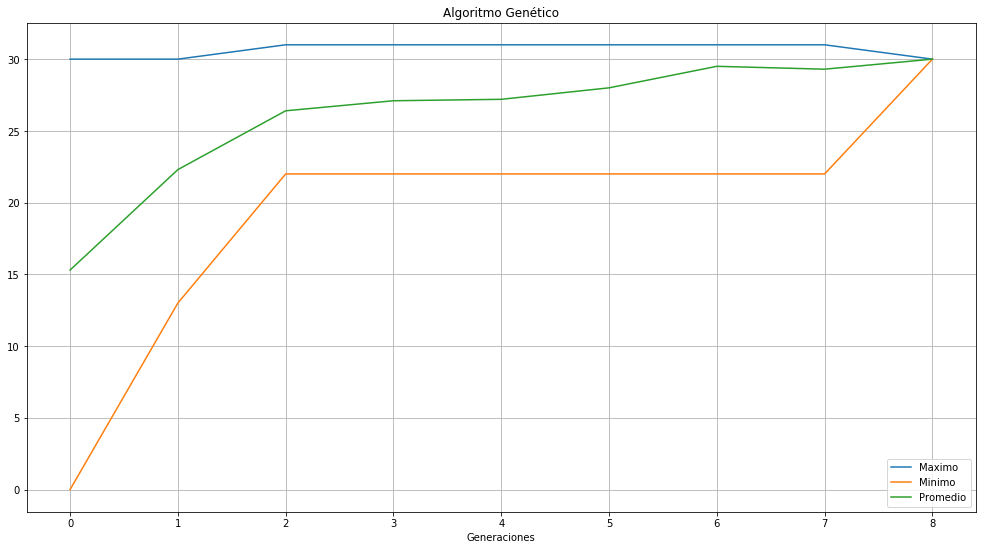

In [9]:
d1 = datas[:3]
l1 = labels[:3]
graphics(l1, d1)

## Graphic Leasts Squares

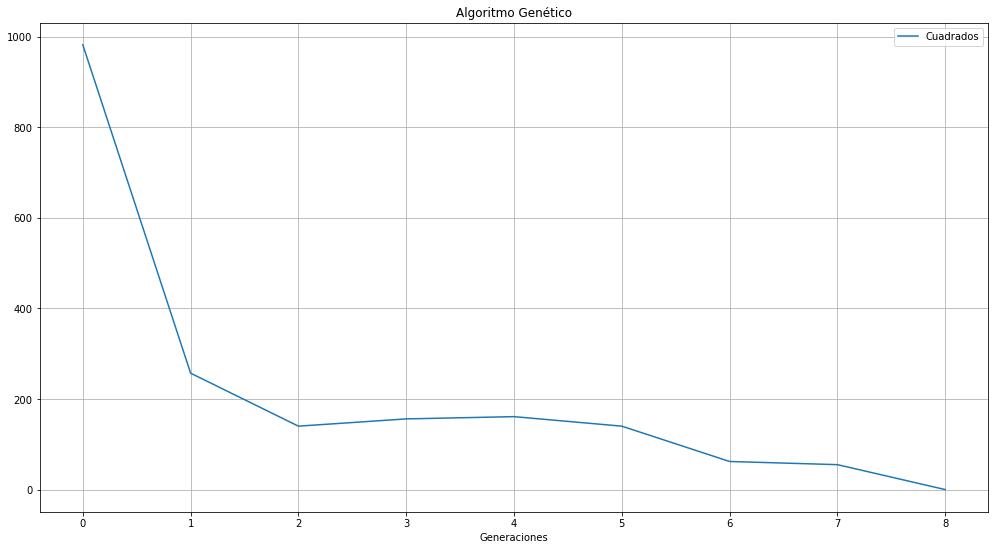

In [10]:
d1 = datas[3:4]
l1 = labels[3:4]
graphics(l1, d1)

## Graphic Range

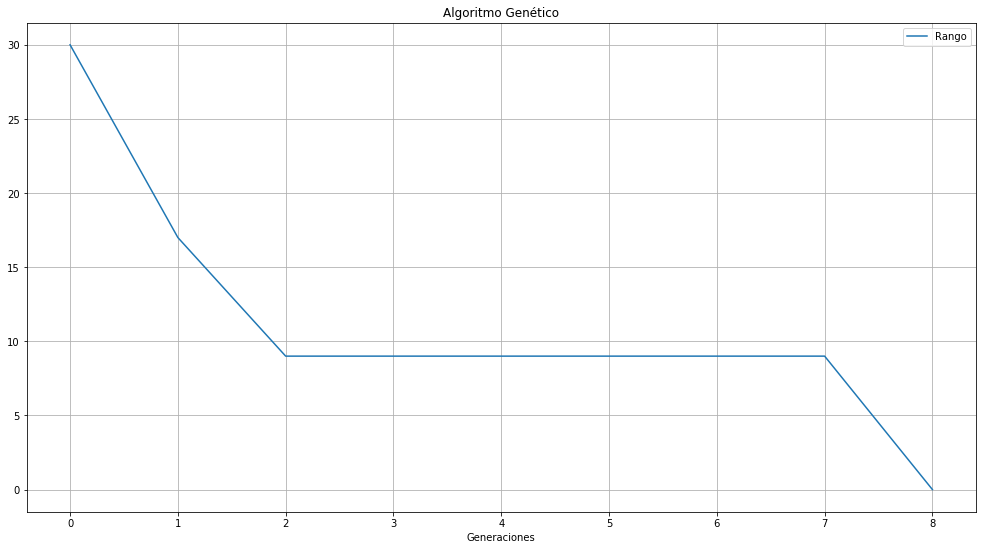

In [11]:
d1 = datas[4:5]
l1 = labels[4:5]
graphics(l1, d1)